In [1]:
import os, shutil

original_dataset_dir = "data/catsVsDogs/train"

dirs = []

base_dir = "data/catsVsDogs_small"
dirs.append(base_dir)

train_dir = os.path.join(base_dir, "train")
dirs.append(train_dir)
validation_dir = os.path.join(base_dir, "validation")
dirs.append(validation_dir)
test_dir = os.path.join(base_dir, "test")
dirs.append(test_dir)

train_cats_dir = os.path.join(train_dir, "cats")
dirs.append(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, "dogs")
dirs.append(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, "cats")
dirs.append(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, "dogs")
dirs.append(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, "cats")
dirs.append(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, "dogs")
dirs.append(test_dogs_dir)

for directory in dirs:
    if not os.path.exists(directory):
       os.mkdir(directory)
    
fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_cats_dir, fname)
    shutil.copy(src, dest)

fnames = ["cat.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_cats_dir, fname)
    shutil.copy(src, dest)

fnames = ["cat.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_cats_dir, fname)
    shutil.copy(src, dest)
   
fnames = ["dog.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_dogs_dir, fname)
    shutil.copy(src, dest)

fnames = ["dog.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_dogs_dir, fname)
    shutil.copy(src, dest)

fnames = ["dog.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_dogs_dir, fname)
    shutil.copy(src, dest)

for directory in dirs:
    print(directory, ":", len(os.listdir(directory)))
    
print("Done.")



data/catsVsDogs_small : 3
data/catsVsDogs_small/train : 2
data/catsVsDogs_small/validation : 2
data/catsVsDogs_small/test : 2
data/catsVsDogs_small/train/cats : 1000
data/catsVsDogs_small/train/dogs : 1000
data/catsVsDogs_small/validation/cats : 500
data/catsVsDogs_small/validation/dogs : 500
data/catsVsDogs_small/test/cats : 500
data/catsVsDogs_small/test/dogs : 500
Done.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras import models, layers, optimizers
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

Using TensorFlow backend.


In [3]:
model = models.Sequential()
model.add(layers.Conv2D(
    32, (3, 3), 
    activation="relu", 
    input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

# Data augmentation

Rescale, rotate, flip, shear, ... your data to increase the size of your training set

In [4]:
# Image generator:  all it does at the moment is resaling the entries to [0,1]

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen   = ImageDataGenerator(rescale=1./255)
test_datagen   = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150), 
    batch_size = 20,
    class_mode="binary"
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150), 
    batch_size = 20,
    class_mode="binary"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150), 
    batch_size = 20,
    class_mode="binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch = 100, # similar to batches
    epochs = 30,
    validation_data=val_generator,
    validation_steps = 50
)

Epoch 1/30
100/100 [==============================] - 99s 995ms/step - loss: 0.5046 - acc: 0.7550 - val_loss: 0.5063 - val_acc: 0.7530
Epoch 2/30
100/100 [==============================] - 96s 959ms/step - loss: 0.5205 - acc: 0.7415 - val_loss: 0.5759 - val_acc: 0.7030
Epoch 3/30
100/100 [==============================] - 94s 938ms/step - loss: 0.5089 - acc: 0.7515 - val_loss: 0.4778 - val_acc: 0.7610
Epoch 4/30
100/100 [==============================] - 96s 959ms/step - loss: 0.5036 - acc: 0.7515 - val_loss: 0.5433 - val_acc: 0.7310
Epoch 5/30
100/100 [==============================] - 95s 951ms/step - loss: 0.5058 - acc: 0.7555 - val_loss: 0.5189 - val_acc: 0.7530
Epoch 6/30
100/100 [==============================] - 93s 934ms/step - loss: 0.4969 - acc: 0.7590 - val_loss: 0.5010 - val_acc: 0.7600
Epoch 7/30
100/100 [==============================] - 97s 973ms/step - loss: 0.4995 - acc: 0.7570 - val_loss: 0.4939 - val_acc: 0.7530
Epoch 8/30
100/100 [==============================] - 1

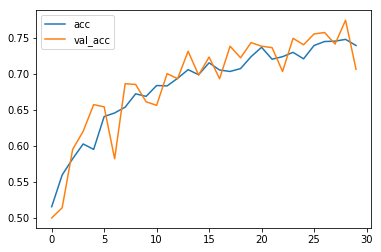

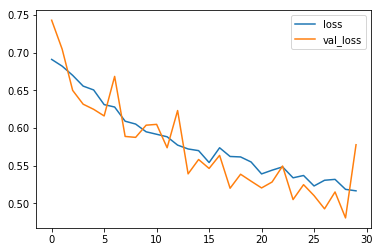

In [7]:
def plot_history(history):
    plt.plot(history["acc"], label="acc")
    plt.plot(history["val_acc"], label="val_acc")
    plt.legend()
    plt.show()
    plt.close()
    
    plt.plot(history["loss"], label="loss")
    plt.plot(history["val_loss"], label="val_loss")
    plt.legend()
    plt.show()
    plt.close()

plot_history(history.history) 

# We learned:

Data augmentation & dropout:
    * validation accuracy rises
    * number of epochs have to be increased (maybe 100 epochs)